In [1]:
import numpy as np
import matplotlib.pylab as plt

import pandas as pd

import hist
from hist import Hist

import glob
import os

In [2]:
datasets = ['Met_collision', 
            'DYJetsToNuNu_100To250','DYJetsToNuNu_250To400',
            'DYJetsToNuNu_400To650', 'DYJetsToNuNu_650ToInf',
            'Z1JetsToNuNu_150To250', 'Z1JetsToNuNu_250To400', 'Z1JetsToNuNu_400ToInf',
            'Z2JetsToNuNu_150To250', 'Z2JetsToNuNu_250To400', 'Z2JetsToNuNu_400ToInf']

for dataset in datasets:
    # Initializes variables to store cumulative values.
    N_gen = 0
    nevents = 0
    gw_pos = 0
    gw_neg = 0
    # Flag to indicate whether the current dataset is collision.
    IS_COLLISION = False

    path = r'./'
    all_files = glob.glob(os.path.join(path, f"{dataset}.csv"))
    print(f"Processing {len(all_files)} files in {dataset}")

    list_of_dataframes = []
    for filename in all_files:
        # Checks if the file is a collision dataset.
        if 'collision' in filename:
            IS_COLLISION = True
        df = pd.read_csv(filename, index_col=None, header=0)
        list_of_dataframes.append(df)

        if len(df) > 0:
            N_gen += df['N_gen'][0] 
            gw_pos += df['gw_pos'][0] 
            gw_neg += df['gw_neg'][0] 

    # Sets values to -999 if the dataset is collision
    if IS_COLLISION:
        N_gen = -999
        gw_pos = -999
        gw_neg = -999

    if list_of_dataframes:
        # Concatenate all the DataFrames in the list into a single DataFrame.
        df = pd.concat(list_of_dataframes, axis=0, ignore_index=True)
        df['N_gen'] = N_gen
        df['gw_pos'] = gw_pos
        df['gw_neg'] = gw_neg
    else:
        df = pd.DataFrame(columns=['N_gen', 'nevents', 'gw_pos', 'gw_neg'])
        print(f"No files found for {dataset}. Empty DataFrame created.")
    
    output_path = './processed_datasets'
    os.makedirs(output_path, exist_ok=True)
    
    df.to_csv(os.path.join(output_path, f'Processed_{dataset}.csv'), index=False)

Processing 1 files in Met_collision
Processing 1 files in DYJetsToNuNu_100To250
Processing 1 files in DYJetsToNuNu_250To400
Processing 1 files in DYJetsToNuNu_400To650
Processing 1 files in DYJetsToNuNu_650ToInf
Processing 1 files in Z1JetsToNuNu_150To250
Processing 1 files in Z1JetsToNuNu_250To400
Processing 1 files in Z1JetsToNuNu_400ToInf
Processing 1 files in Z2JetsToNuNu_150To250
Processing 1 files in Z2JetsToNuNu_250To400
Processing 1 files in Z2JetsToNuNu_400ToInf


In [3]:
input_path = './processed_datasets'

data = {}

for dataset in datasets:
    file_path = os.path.join(input_path, f'Processed_{dataset}.csv')
    
    df = pd.read_csv(file_path)
    
    N_gen = df['N_gen'][0]
    
    data[dataset] = {'df': df, 'N_gen': N_gen}

In [4]:
data

{'Met_collision': {'df':      pileup  weight  N_gen  gw_pos  gw_neg muon_pt muon_eta muon_phi  \
  0    -999.0  -999.0   -999    -999    -999      []       []       []   
  1    -999.0  -999.0   -999    -999    -999      []       []       []   
  2    -999.0  -999.0   -999    -999    -999      []       []       []   
  3    -999.0  -999.0   -999    -999    -999      []       []       []   
  4    -999.0  -999.0   -999    -999    -999      []       []       []   
  ..      ...     ...    ...     ...     ...     ...      ...      ...   
  129  -999.0  -999.0   -999    -999    -999      []       []       []   
  130  -999.0  -999.0   -999    -999    -999  [3.71]   [1.34]  [0.573]   
  131  -999.0  -999.0   -999    -999    -999  [7.39]   [1.81]   [2.08]   
  132  -999.0  -999.0   -999    -999    -999      []       []       []   
  133  -999.0  -999.0   -999    -999    -999      []       []       []   
  
      muon_mass     met_pt  ...  lead_jet3_phi  lead_jet3_mass  \
  0          []  232

In [5]:
data['Z2JetsToNuNu_400ToInf']['df']

pileup    weight    N_gen   gw_pos   gw_neg muon_pt  muon_eta muon_phi  \
0       41.0  4.507089  33379.0  58565.0  25186.0  [5.75]  [-0.845]  [-2.95]   
1       23.0 -4.507089  33379.0  58565.0  25186.0      []        []       []   
2       15.0 -4.507089  33379.0  58565.0  25186.0      []        []       []   
3       21.0 -4.507089  33379.0  58565.0  25186.0      []        []       []   
4       15.0  4.507089  33379.0  58565.0  25186.0      []        []       []   
...      ...       ...      ...      ...      ...     ...       ...      ...   
2675    30.0  4.507089  33379.0  58565.0  25186.0      []        []       []   
2676    10.0 -4.507089  33379.0  58565.0  25186.0      []        []       []   
2677    20.0 -4.507089  33379.0  58565.0  25186.0      []        []       []   
2678    25.0  4.507089  33379.0  58565.0  25186.0      []        []       []   
2679    15.0  4.507089  33379.0  58565.0  25186.0      []        []       []   

     muon_mass     met_pt  ...  lead_jet3_phi  lead_jet3_mass  \
0      [0.106]  450.26642  ...       0.647095       21.609375   
1           []  471.58157  ...      -2.559082       13.507812   
2           []  408.10602  ...      -0.643799        8.070312   
3           []  435.51804  ...       0.609863        5.953125   
4           []  529.91640  ...      -1.057373        6.777344   
...        ...        ...  ...            ...             ...   
2675        []  640.17410  ...      -1.960938        5.031250   
2676        []  419.68445  ...      -1.288818        6.343750   
2677        []  427.81726  ...       2.587891        6.957031   
2678        []  438.17435  ...      -1.180908       37.218750   
2679        []  430.98846  ...      -0.944824       18.531250   

      lead_jet3_btag_csvv2  lead_jet3_ch_hef  lead_jet4_pt lead_jet4_eta  \
0                 0.735840          0.515625     51.937500     -0.046600   
1                 0.111450          0.882812     52.718750      1.313232   
2                 0.212769          0.402344     37.531250     -0.072998   
3               -10.000000          0.351562     17.765625     -0.074142   
4                 0.645508          0.703125     22.281250     -0.146576   
...                    ...               ...           ...           ...   
2675              0.267822          0.554688     19.796875     -0.437988   
2676              0.126831          0.812500     22.937500     -1.351318   
2677              0.475342          0.851562     21.796875     -2.378418   
2678              0.215820          0.609375     17.531250      1.400879   
2679              0.408936          0.167969     75.062500      0.909790   

     lead_jet4_phi lead_jet4_mass lead_jet4_btag_csvv2 lead_jet4_ch_hef  
0         1.394287       9.750000             0.225952         0.468750  
1        -2.454590      10.703125             0.390625         0.742188  
2        -1.050537       6.667969             0.170898         0.531250  
3         0.824341       4.414062             0.103088         0.531250  
4         0.963135       3.796875             0.186523         0.609375  
...            ...            ...                  ...              ...  
2675      0.641479       4.464844             0.164429         0.578125  
2676     -1.414795       4.671875             0.177246         0.531250  
2677     -0.377563       4.878906             0.139771         0.757812  
2678     -2.700684       3.562500             0.556641         0.179688  
2679     -2.070801       9.992188             0.187012         0.281250  

[2680 rows x 51 columns]

In [6]:
data['Z1JetsToNuNu_150To250']['N_gen']

13283.0

In [7]:
data['Z1JetsToNuNu_250To400']['N_gen']

250501.0

In [8]:
data['Z1JetsToNuNu_400ToInf']['N_gen']

3082.0

In [9]:
data['Z2JetsToNuNu_150To250']['N_gen']

283424.0

In [10]:
data['Z2JetsToNuNu_250To400']['N_gen']

106879.0

In [11]:
data['Z2JetsToNuNu_400ToInf']['N_gen']

33379.0

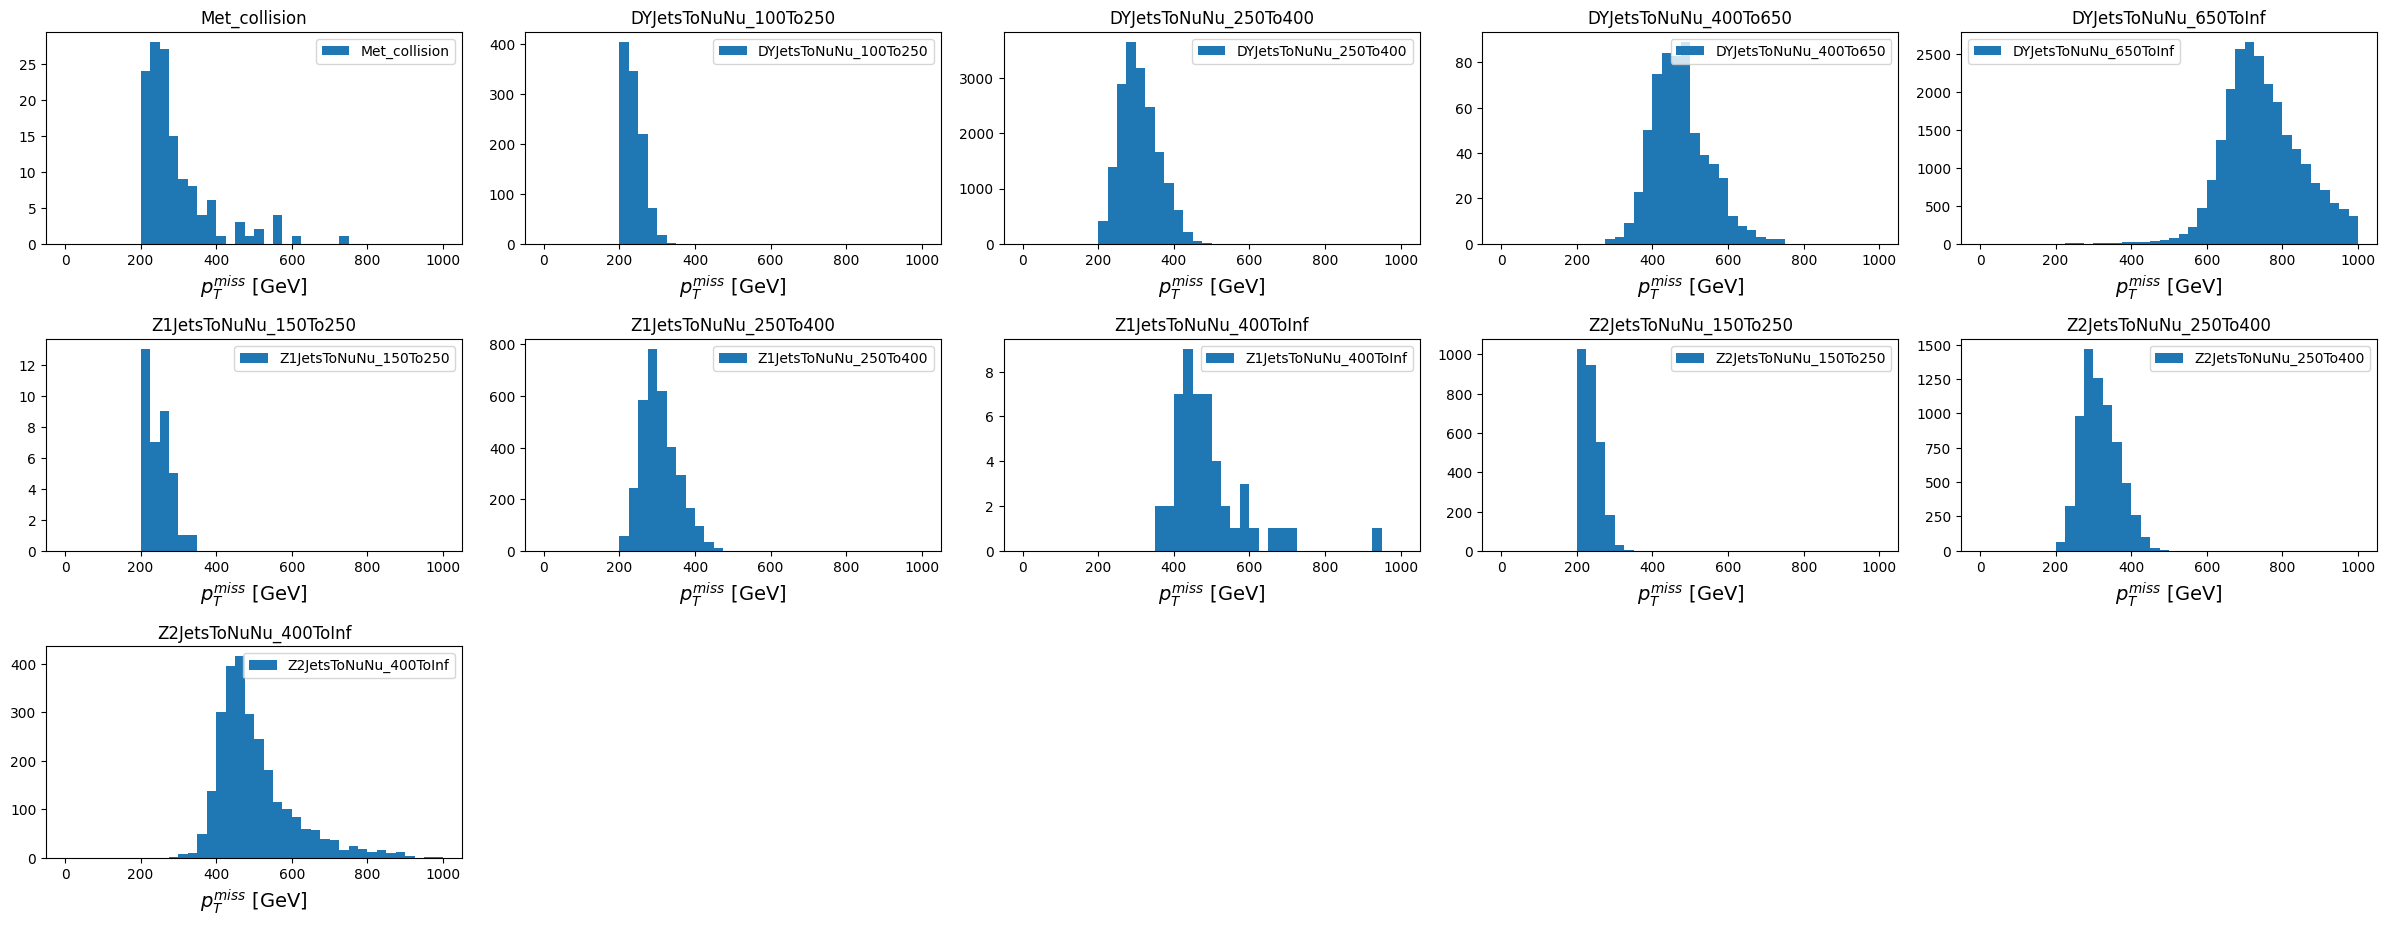

In [12]:
plt.figure(figsize=(24,18))

for i, dataset in enumerate(datasets):
    # Verifica se a coluna met_pt existe no DataFrame atual
    if 'met_pt' in data[dataset]['df'].columns:
        vals = data[dataset]['df']['met_pt'].values
    else:
        print(f"Warning: 'met_pt' column not found in {dataset}")
        continue  # Pula para o próximo dataset caso a coluna não exista
    
    # Configura o subplot
    plt.subplot(6, 5, i + 1)
    plt.hist(vals, bins=40, range=(0, 1000), label=dataset)
    plt.xlabel('$p_{T}^{miss}$ [GeV]', fontsize=14)  # Etiqueta para met_pt
    plt.title(f'{dataset}', fontsize=12)  # Título para cada subplot
    plt.legend()

plt.tight_layout()
plt.show()

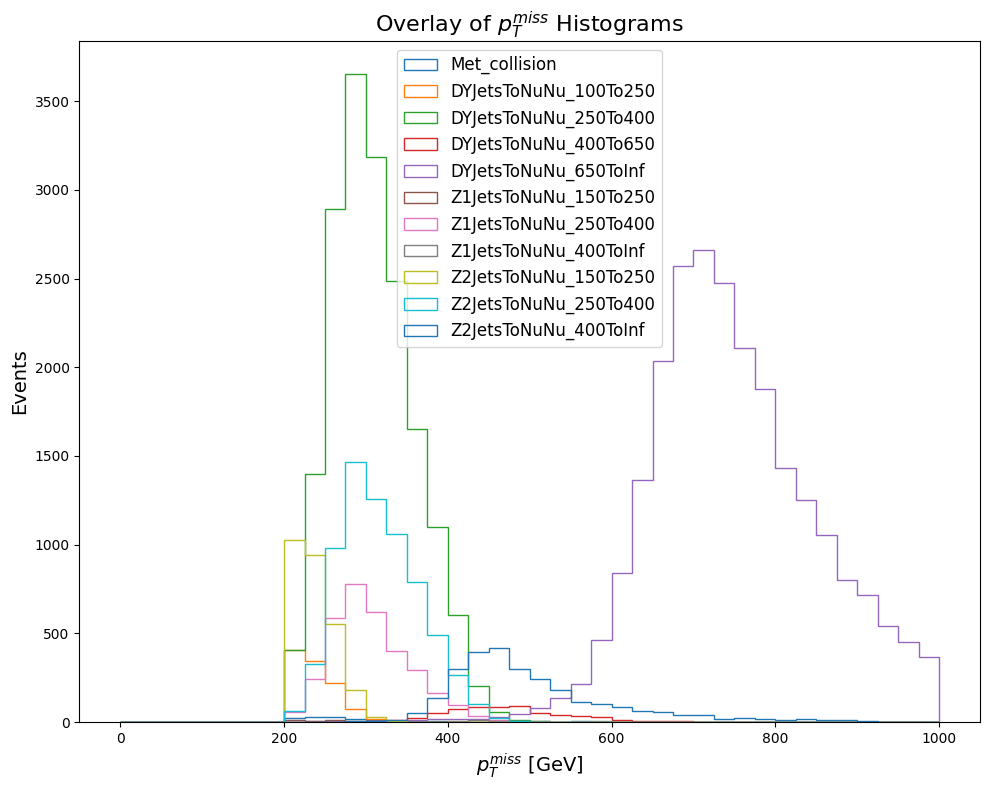

In [13]:
plt.figure(figsize=(10, 8))

bins = np.linspace(0, 1000, 41)

for dataset in datasets:
    df = data[dataset]['df']  
    if 'met_pt' in df.columns:  
        values = df['met_pt'].values  
        plt.hist(
            values,
            bins=bins,
            histtype='step',
            label=f"{dataset}"
        )
    else:
        print(f"Warning: 'met_pt' column not found in {dataset}")

plt.xlabel('$p_{T}^{miss}$ [GeV]', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.title('Overlay of $p_{T}^{miss}$ Histograms', fontsize=16)
plt.legend(fontsize=12)
plt.grid(False)

plt.tight_layout()
plt.show()

In [14]:
# Define integrated luminosities for different prefixes
luminosity_ZJets = 17.06  # fb^-1 for Z1JetsToNuNu and Z2JetsToNuNu
luminosity_DYJets = 35.9  # fb^-1 for DYJetsToNuNu

# Set the cross sections
data['Z1JetsToNuNu_150To250']['xsec'] = 93460  # fb
data['Z1JetsToNuNu_250To400']['xsec'] = 10730  # fb  
data['Z1JetsToNuNu_400ToInf']['xsec'] = 1248  # fb 
data['Z2JetsToNuNu_150To250']['xsec'] = 86170  # fb
data['Z2JetsToNuNu_250To400']['xsec'] = 10820  # fb
data['Z2JetsToNuNu_400ToInf']['xsec'] = 1342  # fb
data['DYJetsToNuNu_100To250']['xsec'] = 164400  # fb 
data['DYJetsToNuNu_250To400']['xsec'] = 6225  # fb 
data['DYJetsToNuNu_400To650']['xsec'] = 835  # fb 
data['DYJetsToNuNu_650ToInf']['xsec'] = 78.1  # fb 

# Iterate over background datasets to calculate weights
for dataset in ['Z1JetsToNuNu_150To250', 'Z1JetsToNuNu_250To400', 'Z1JetsToNuNu_400ToInf',
                'Z2JetsToNuNu_150To250', 'Z2JetsToNuNu_250To400', 'Z2JetsToNuNu_400ToInf',
                'DYJetsToNuNu_100To250', 'DYJetsToNuNu_250To400', 'DYJetsToNuNu_400To650',
                'DYJetsToNuNu_650ToInf']:
    
    N_gen = data[dataset]['N_gen']  
    xsec = data[dataset]['xsec']    

    # Use appropriate integrated luminosity based on dataset prefix
    if dataset.startswith('Z1JetsToNuNu') or dataset.startswith('Z2JetsToNuNu'):
        integrated_luminosity = luminosity_ZJets
    elif dataset.startswith('DYJetsToNuNu'):
        integrated_luminosity = luminosity_DYJets
    else:
        raise ValueError(f"Unexpected dataset prefix: {dataset}")

    # Calculate the weight     
    weight = integrated_luminosity * xsec / N_gen
    data[dataset]['weight'] = weight

# Assign a weight to the collision dataset
data['Met_collision']['weight'] = 1

In [15]:
for dataset in ['Z1JetsToNuNu_150To250', 'Z1JetsToNuNu_250To400', 'Z1JetsToNuNu_400ToInf',
                'Z2JetsToNuNu_150To250', 'Z2JetsToNuNu_250To400', 'Z2JetsToNuNu_400ToInf',
                'DYJetsToNuNu_100To250','DYJetsToNuNu_250To400', 'DYJetsToNuNu_400To650', 
                'DYJetsToNuNu_650ToInf']:
    
    print(f"Dataset: {dataset}, Weight: {data[dataset]['weight']}")

Dataset: Z1JetsToNuNu_150To250, Weight: 120.03520289091318
Dataset: Z1JetsToNuNu_250To400, Weight: 0.7307507754460062
Dataset: Z1JetsToNuNu_400ToInf, Weight: 6.908137573004542
Dataset: Z2JetsToNuNu_150To250, Weight: 5.1867879925482665
Dataset: Z2JetsToNuNu_250To400, Weight: 1.7270857698893138
Dataset: Z2JetsToNuNu_400ToInf, Weight: 0.685895922586057
Dataset: DYJetsToNuNu_100To250, Weight: 10.238637152175421
Dataset: DYJetsToNuNu_250To400, Weight: 0.7132586916209996
Dataset: DYJetsToNuNu_400To650, Weight: 4.010770671661761
Dataset: DYJetsToNuNu_650ToInf, Weight: 0.008357248458979647


In [16]:
h = Hist.new.Reg(40, 0, 1000, name='pt_miss', label='$p_{T}^{miss}$ [GeV]') \
              .StrCat([], name="dataset", label="dataset", growth=True) \
              .Weight()

# Loop to fill the histogram with the values of 'pt_miss' and apply the weights
for dataset in datasets:
    vals = data[dataset]['df']['met_pt'].values

    weight = data[dataset]['weight']

    h.fill(pt_miss=vals, dataset=dataset, weight=weight)

In [17]:
h

Hist(
  Regular(40, 0, 1000, name='pt_miss', label='$p_{T}^{miss}$ [GeV]'),
  StrCategory(['Met_collision', 'DYJetsToNuNu_100To250', 'DYJetsToNuNu_250To400', 'DYJetsToNuNu_400To650', 'DYJetsToNuNu_650ToInf', 'Z1JetsToNuNu_150To250', 'Z1JetsToNuNu_250To400', 'Z1JetsToNuNu_400ToInf', 'Z2JetsToNuNu_150To250', 'Z2JetsToNuNu_250To400', 'Z2JetsToNuNu_400ToInf'], growth=True, name='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=61104.9, variance=748061) (WeightedSum(value=61135.9, variance=748070) with flow)

In [18]:
z_jets_sum = (
    h[:, 'Z1JetsToNuNu_150To250'].project('pt_miss')
    + h[:, 'Z1JetsToNuNu_250To400'].project('pt_miss')
    + h[:, 'Z1JetsToNuNu_400ToInf'].project('pt_miss')
    + h[:, 'Z2JetsToNuNu_150To250'].project('pt_miss')
    + h[:, 'Z2JetsToNuNu_250To400'].project('pt_miss')
    + h[:, 'Z2JetsToNuNu_400ToInf'].project('pt_miss')
)

dy_jets_sum = (
    h[:, 'DYJetsToNuNu_100To250'].project('pt_miss')
    + h[:, 'DYJetsToNuNu_250To400'].project('pt_miss')
    + h[:, 'DYJetsToNuNu_400To650'].project('pt_miss')
    + h[:, 'DYJetsToNuNu_650ToInf'].project('pt_miss')
)

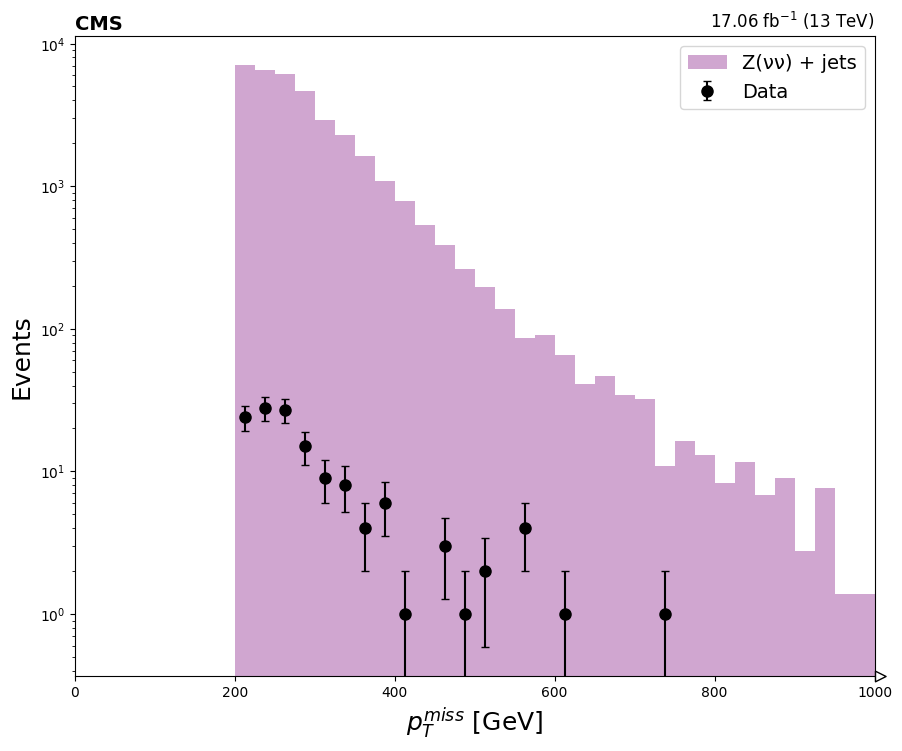

In [19]:
plt.figure(figsize=(10, 8))

z_jets_sum.plot(histtype="fill", color='#BC80BD', alpha=0.7, label='Z(νν) + jets')

# Plot the collision data with error bars
met_data = h[:, 'Met_collision'].project('pt_miss')
event_counts = met_data.values()
errors = np.sqrt(event_counts)  

plt.errorbar(
    met_data.axes[0].centers, event_counts,
    yerr=errors, fmt='o', color='black', label='Data', capsize=3, markersize=8
)

plt.yscale('log')
plt.xlabel('$p_{T}^{miss}$ [GeV]', fontsize=18)
plt.ylabel('Events', fontsize=18)
plt.xlim(0, 1000)
plt.title("17.06 fb$^{-1}$ (13 TeV)", loc='right', fontsize=12)
plt.text(
    0, 1.01,  
    "CMS",  
    fontsize=14,
    fontweight='bold',
    transform=plt.gca().transAxes  
)

plt.legend(fontsize=14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.savefig("met.png", dpi=300, bbox_inches="tight")

plt.show()

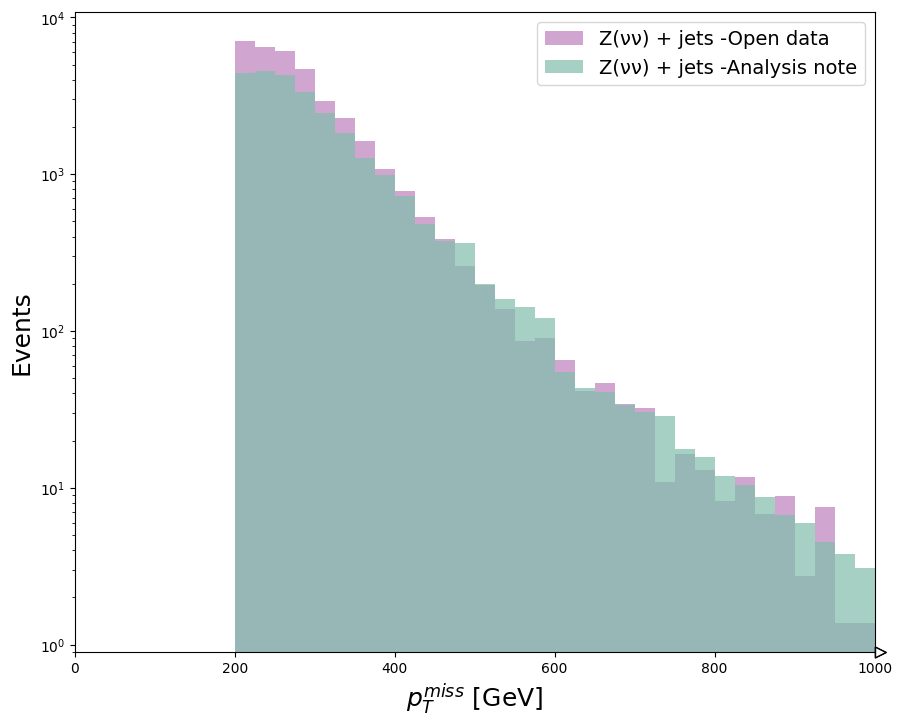

In [20]:
plt.figure(figsize=(10, 8))

z_jets_sum.plot(histtype="fill", color='#BC80BD', alpha=0.7, label='Z(νν) + jets -Open data')

dy_jets_sum.plot(histtype="fill", color='#80BDAC', alpha=0.7, label='Z(νν) + jets -Analysis note')

plt.yscale('log')
plt.xlabel('$p_{T}^{miss}$ [GeV]', fontsize=18)
plt.ylabel('Events', fontsize=18)
plt.xlim(0, 1000)

plt.legend(fontsize=14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.savefig("met_distribution.png", dpi=300, bbox_inches="tight")

plt.show()